In [1]:
import numpy as np # library for data structures, vectors, matrices and mathematical functions
import matplotlib.pyplot as plt                   # library for plotting and visual representation
import matplotlib.transforms as transform                   # library for plotting and visual representation
from matplotlib import rcParams                   # module handling generic plot parameters
from matplotlib.ticker import (FormatStrFormatter)# module for figure axis formatting
from matplotlib import colormaps
import pandas as pd                               # data administration, here used for data import
from scipy.optimize import curve_fit              # fitting algorithm from the scipy package
from IPython.display import display as dy, Markdown as md, Latex as Lx, Image as Im, HTML as hm # displaying LaTeX code in code cells
import os
import re
from scipy.signal import find_peaks

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 15,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',
                     'figure.figsize': (10,6),
                    })
plt.rcParams['axes.facecolor'] = 'black' 
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['xtick.labelcolor'] = 'white'
plt.rcParams['ytick.labelcolor'] = 'white'
plt.rcParams['legend.labelcolor'] = 'white'
plt.rcParams['grid.color'] = '#707070'
plt.rcParams['axes.titlepad'] = 20
legendfontsize=12
#cmap = plt.get_cmap('hsv')
#norm = plt.Normalize(vmin=0, vmax=12)
ip = get_ipython()
ibe = ip.configurables[-1]
ibe.figure_formats = { 'pdf', 'png'}

#  E17e Fourier Analysis of Coupled Electric Oscillations


Group #13

NG Kuok Fung | #3797903 

Edgar Harutyunyan | #3775171

**Overview of Tasks**

1. Measure the time traces and frequency spectra of the free beat oscillations of the low-point circuit for ten different coupling capacitance values. Plot the ten frequency spectra into one graph. Determine the frequencies of the in-phase and out-of-phase oscillation modes. Calculate the coupling factors from the measured frequencies. Fit the theoretical expressions to the data to determine the value of the capacitance C.
</br>

2. Measure the time traces and frequency spectra of the free beat oscillations of the high-point circuit for ten different coupling capacitance values. Plot the ten frequency spectra into one graph. Determine the frequencies of the in-phase and out-of-phase oscillation modes. Calculate the coupling factors from the measured frequencies. Fit the theoretical expressions to the data to determine the value of the capacitance C.
</br>

3. Measure the beat period of the high-point circuit for one selected coupling factor. Compare the values to those obtained from the frequencies of the in-phase and out-of-phase oscillation modes. Make plots of both the time trace and the spectrum.
</br>

4. Measure the coupling factor for two inductively coupled resonant circuits as a function of the distance between the inductance coils. Plot the frequency spectra in one graph. Plot the coupling factor as a function of distance and analyze the distance dependence.

In [2]:
# GLOBALS
data_dir='./data/'
L =2*1e-3 #H

## Task 1

***Task Definition*** 

- Measure the time traces and frequency spectra of the free beat oscillations of the low-point circuit for ten different coupling capacitance $C_k$ values.

- Plot the ten frequency spectra into one graph. 

- Determine the frequencies of the in-phase $f_1$ and out-of-phase $f_2$ oscillation modes.

- Calculate the coupling factors $k_{C,T}$ from the measured frequencies. 

- Fit the theoretical expressions to the data to determine the value of the capacitance C.



***Theoretical Basis*** 

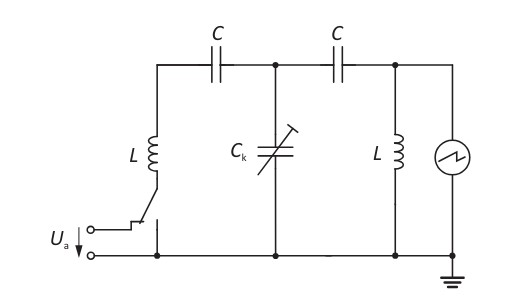

<IPython.core.display.Latex object>

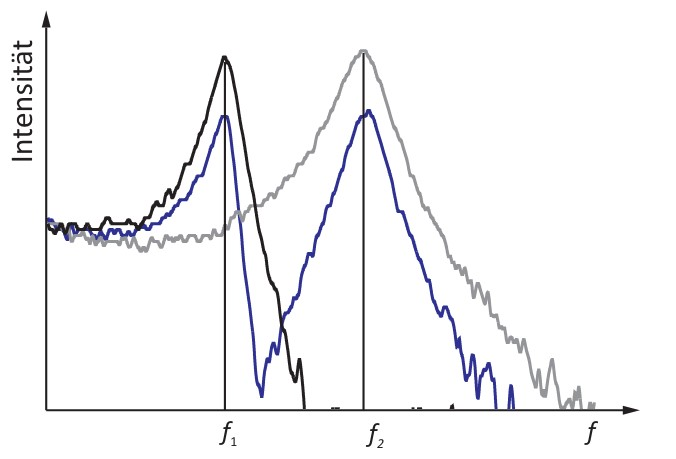

<IPython.core.display.Latex object>

In [3]:
dy(Im("./img/Low.jpg", height=100, width=400))
dy(Lx(r'$Figure\, 1.1$: Low-Point Circuit [1]'))

dy(Im("./img/peak.jpg", height=100, width=400))
dy(Lx(r'$Figure\, 1.2$: Frequency Spectra: Beat Oscillation (Blue Curve) [1]'))

In task 1, a low-point resonant circuit is set up which produces beats. **Fig 1.1**.

A beat has an in-phase-oscillation $f_1$ and out-of-phase oscillation $f_2$ frequency, which depends on the total capacitance $C$ and $C_k$ **Fig 1.2**.

The values of $f_1$ and $f_2$ are related by the coupling constant $k_{C,T}$ given by:

$$ k_{C,T} = \left| \frac{\omega_1^2 - \omega_2^2}{\omega_1^2 - \omega_2^2} \right| \label{eq1.1} \tag{1.1} $$

$$\omega_i = 2\pi f_i$$

- $\omega_1$ : In-phase angular frequency
- $\omega_2$ : Out-of-phase angular frequency

Additionally, for a low-point circuit, the relationship between $k_{C,T}$, $C$ and $C_k$ is given by:

$$k_{C,T} = \frac{C}{C+C_k} \label{eq1.2} \tag{1.2}$$

- $C$ : Capacitance of Fixed Capacitor 
- $C_k$ : Capacitance of Coupling Capacitor
- $k_{C,T}$ : Coupling factor of low-point circuit

***Procedure*** 

1. The circuit was set up following the circuit diagram  **Fig 1.1**, and the value of $C_k$ is varied using a capacitor decade.


2. The corresponding time trace and frequency spectrum was recorded using [PicoScope 7 software](https://www.picotech.com/products/picoscope-7-software) installed on a host connected to the PicoScope 2000.


3. Based on frequency spectra **Fig 1.2**, the frequencies $f_1$ and $f_2$ were determined using ``find_peaks`` method from `scipy.signal` python module library.


4. The value of $k_{C,T}$ was calculated using Eq [1.1](#mjx-eqn-eq1.1). 


5. The process was repeated for 10 values of $C_k$


6. Linear regression was performed using the values of $C_k$, $k_{C,T}$ and fitting function [1.2](#mjx-eqn-eq1.2).


7. Finally, the value of $C$ is determined from the fit.

In [4]:
# Data Preprocessing
task_dir = data_dir + 'Task1/csv/'
C_k_l = [] # Capacitance in pF
df_l = []

for path in os.listdir(task_dir):
    s = re.findall('.*pF', path)[0] #Find all files with pF ending
    #C_k_str_l.append(s) #Append s to C_k_str_list
    r = float(s[:-2]) #Slice last 2 elements and convert to float
    C_k_l.append(r) # pF floats
    df = pd.read_csv(task_dir + path, delimiter=',', skiprows=1, dtype=np.float64, decimal='.')
    df.columns = ['Frequency', 'Voltage'] 
    df_l.append(df)
    
sorted_lists = sorted(zip(C_k_l, df_l))
C_k_l, df_l = zip(*sorted_lists)

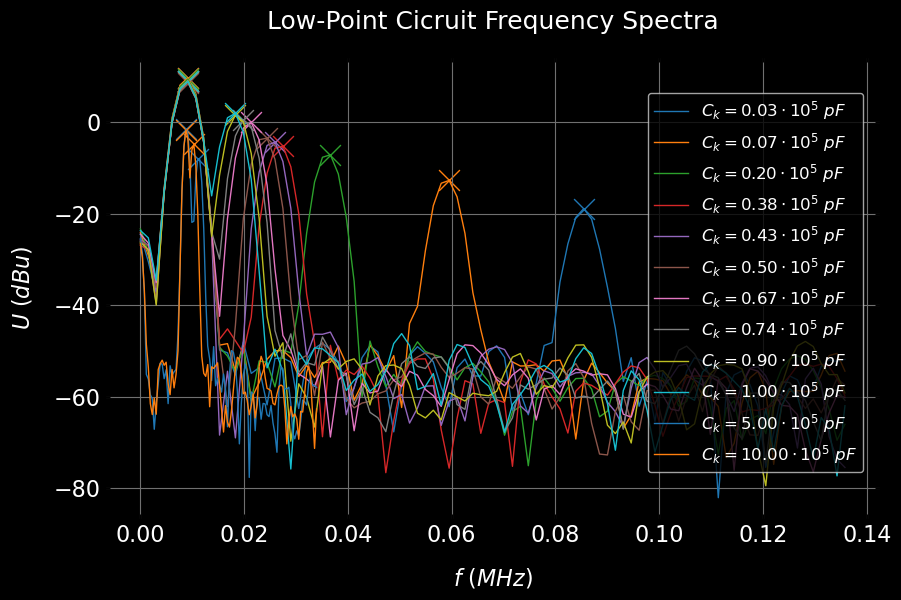

<IPython.core.display.Latex object>

In [5]:
f_in_l = [] # in MHz
f_out_l = [] # in MHz
w_in_l = [] # in MHz
w_out_l = [] # in MHz
for i in range(len(C_k_l)):
    
    label_s = r'$C_k = %.2f \cdot 10^5 ~pF$' % (C_k_l[i]*1e-5)
    
    x = np.array(df_l[i]['Frequency'])
    y = np.array(df_l[i]['Voltage'])
    peaks, _ = find_peaks(y[:80], height=-40)
    
    #Appending frequencies corresponding to peaks
    f_in_l.append(x[peaks][0]) #MHz
    f_out_l.append(x[peaks][1]) #MHz
    w_in_l.append(x[peaks][0]*2*np.pi) #MHz
    w_out_l.append(x[peaks][1]*2*np.pi) #MHz
    
    plt.scatter(x[peaks], y[peaks], marker='x')
    plt.plot(x[:90], y[:90],label=label_s)
    
    

plt.title(r'Low-Point Cicruit Frequency Spectra')
plt.xlabel(r'$f$ ($MHz$)')
plt.ylabel(r'$U$ ($dBu$)')
plt.legend(loc=(0.7,0.1))
plt.grid(True)
plt.show()
dy(Lx(r'$Figure\, 1.2$: Frequency spectra plot of 12 measurements of low-point circuit.'))

In [6]:
def k_fit(c_k_arg, c_arg):
    return c_arg/(c_k_arg+c_arg)

w_in_arr = np.array(w_in_l) #MHz #Correct
w_out_arr = np.array(w_out_l) #MHz #Correct
k_l_arr = abs((w_in_arr**2 - w_out_arr**2)/(w_out_arr**2 + w_in_arr**2)) #Correct
k_C_T = k_l_arr
C_K_T = np.array(C_k_l)
#Fitting
fit = curve_fit(k_fit, np.array(C_k_l), k_l_arr)
C = fit[0][0] #in pF
u_C = np.sqrt(fit[1][0][0])
dy(Lx(r'Capacitance from fitting: $$C = (%.2f \pm %.3f) ~\mu F$$' % (C*1e-6, u_C*1e-6)))

<IPython.core.display.Latex object>

## Task 2

***Task Definition*** 

- Measure the time traces and frequency spectra of the free beat oscillations of the low-point circuit for ten different coupling capacitance $C_k$ values.

- Plot the ten frequency spectra into one graph. 

- Determine the frequencies of the in-phase $f_+$ and out-of-phase $f_-$ oscillation modes.

- Calculate the coupling factors $k_{C,H}$ from the measured frequencies. 

- Fit the theoretical expressions to the data to determine the value of the capacitance $C$.

***Theoretical Basis*** 

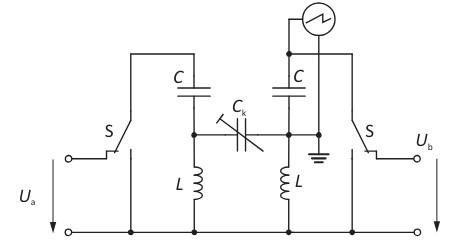

<IPython.core.display.Latex object>

In [7]:
dy(Im("./img/High.jpg", height=100, width=400))
dy(Lx(r'$Figure\, 2.1$: High-Point Circuit [1]'))

The coupling factor $k_{C,H}$ of high-point circuit:

$$k_{C,H} = \frac{\omega_2^2 -\omega_1^2}{\omega_2^2 + \omega_1^2} = \frac{C_K}{C + C_K} \label{eq2.1} \tag{2.1}$$

***Procedure***

1. The procedure has been carried out similar to Task1, and uses [Eq 2.1](#mjx-eqn-eq2.1) as the fitting function instead.

In [8]:
# Data Preprocessing
task_dir = data_dir + 'Task2/csv/'
C_k_l = [] # capacitance in Farads
C_k_str_l = []
df_l = []

for path in os.listdir(task_dir):
    s = re.findall('.*pF', path)[0]
    C_k_str_l.append(s)
    r = float(''.join(s[:-2]))
    C_k_l.append(r) # pF
    df = pd.read_csv(task_dir + path, delimiter=';', skiprows=1, dtype=np.float64, decimal=',')
    df.columns = ['Frequency', 'Voltage'] 
    df_l.append(df)

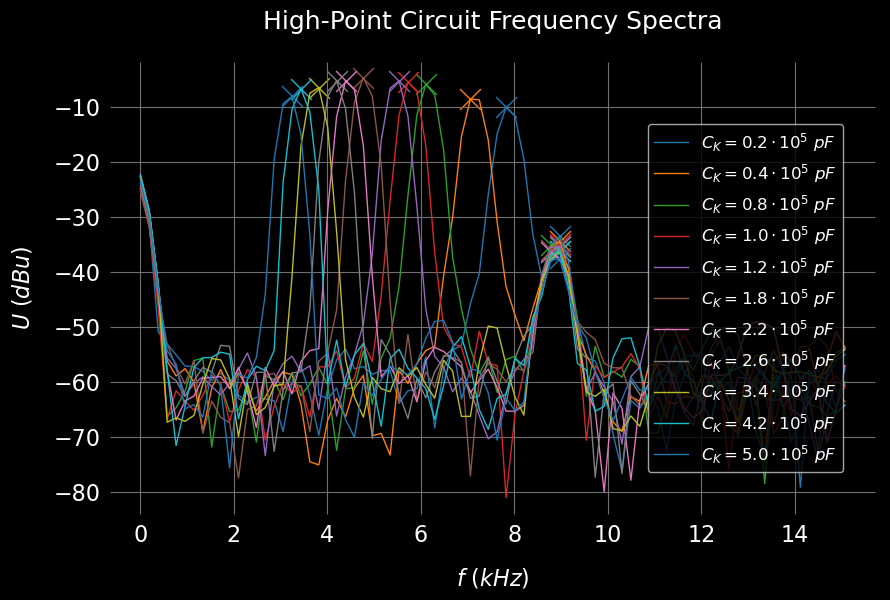

<IPython.core.display.Latex object>

In [9]:
f_in_l = [] # in kHz
f_out_l = [] # in kHz
w_in_l = [] # in rad * Hz
w_out_l = [] # in rad * Hz
for i in range(len(C_k_l)):
    
    label_s = r'$C_K = %s \cdot 10^{%s} ~pF$' % (C_k_str_l[i][:-4], C_k_str_l[i][-3])
    
    x = np.array(df_l[i]['Frequency'])
    y = np.array(df_l[i]['Voltage'])
    
    peaks, _ = find_peaks(y[:80], height=-40)
    f_in_l.append(x[peaks][0])
    f_out_l.append(x[peaks][1])
    w_in_l.append(x[peaks][0]*1e3*2*np.pi)
    w_out_l.append(x[peaks][1]*1e3*2*np.pi)
    
    plt.scatter(x[peaks], y[peaks], marker='x')
    plt.plot(x[:80], y[:80], label=label_s)
    
plt.title(r'High-Point Circuit Frequency Spectra')
plt.xlabel(r'$f$ ($kHz$)')
plt.ylabel(r'$U$ ($dBu$)')
plt.legend(loc=(0.7,0.1))
plt.grid(True)
plt.show()
dy(Lx(r'$Figure\, 2.2$: Frequency spectra plot of ten measurements of high-point circuit.'))

In [10]:
def k_fit(c_k_arg, c_arg):
    return c_k_arg/(c_k_arg + c_arg)

In [11]:
w_in_arr = np.array(w_in_l)
w_out_arr = np.array(w_out_l)
k_l_arr = (w_out_arr**2 - w_in_arr**2)/(w_out_arr**2 + w_in_arr**2)
k_C_H = k_l_arr
C_K_H = np.array(C_k_l)
fit = curve_fit(k_fit, np.array(C_k_l), k_l_arr)
C = fit[0][0]
u_C = np.sqrt(fit[1][0][0])
dy(Lx(r'Capacitance from fitting: $$C = (%.2f \pm %.3f) ~\mu F$$' % (C*1e-6, u_C*1e-6)))

<IPython.core.display.Latex object>

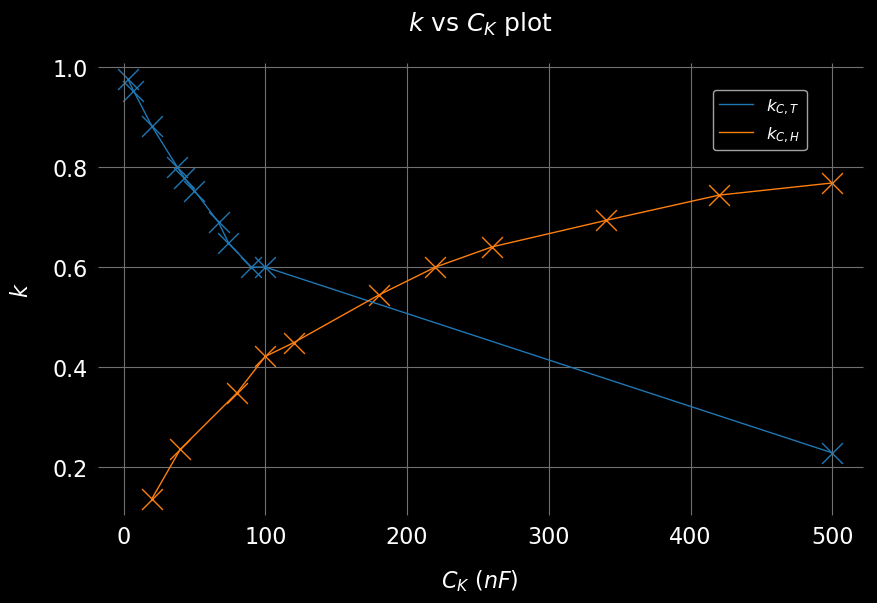

<IPython.core.display.Latex object>

In [12]:
plt.scatter(C_K_T[:-1]*1e-3, k_C_T[:-1], marker='x')
plt.scatter(C_K_H*1e-3, k_C_H, marker='x')
plt.plot(C_K_T[:-1]*1e-3, k_C_T[:-1], label=r'$k_{C,T}$')
plt.plot(C_K_H*1e-3, k_C_H, label=r'$k_{C,H}$')
plt.title(r'$k$ vs $C_K$ plot')
plt.xlabel(r'$C_K$ ($nF$)')
plt.ylabel(r'$k$')
plt.legend(loc=(0.8,0.8))
plt.grid(True)
plt.show()
dy(Lx(r'$Figure\, 2.3$: Coupling factor as a function of coupling capacitance.'))

## Task3

***Task Definition*** 

Measure the beat period of the high-point circuit for one selected coupling factor. Compare the values to those obtained from the frequencies of the in-phase and out-of-phase oscillation modes. Make plots of both the time trace and the spectrum.

***Theoretical Basis*** 

Beat mode is produced by short circuiting the right switch of the high-point circuit (**Fig.2.2**).

Angular frequency of the beat is: 

$$\omega_S = \omega_2 - \omega_1 = \frac{2\pi}{T_S}$$

- $T_S$ : Beat period

***Procedure***

1. The measurements in beat mode were carried out for the coupling capacitance $C_K = 28 \cdot 10^3 pF$.

2. Angular frequecies have been determined using ``find_peaks`` on the frequency spectra.

3. The coupling factor $K_{C,H}$ and capacitance $C$ value were evaluated using [Eq 2.1](#mjx-eqn-eq2.1).

4. Using the measured angular frequencies the oscillation period $T$ and beat period $T_S$ were computed.

In [13]:
# Data Preprocessing
task_dir = data_dir + 'Task3/'
task_3_f = task_dir + '28E3pF_f.csv'
task_3_t = task_dir + '28E3pF_t.csv'
C_k = 28*1e3 # pF

df_f = pd.read_csv(task_3_f, delimiter=';', skiprows=1, dtype=np.float64, decimal=',')
df_t = pd.read_csv(task_3_t, delimiter=';', skiprows=1, dtype=np.float64, decimal=',')   
df_f.columns = ['Frequency', 'Voltage']
df_t.columns = ['Time', 'Voltage']

cut_ind_t = int(len(df_t) * 0.6)  
cut_ind_f = int(len(df_f) * 0.025)

x_t = np.array(df_t['Time'][:cut_ind_t]) # ms
x_f = np.array(df_f['Frequency'][:cut_ind_f]) # kHz

y_t = np.array(df_t['Voltage'][:cut_ind_t]) # V
y_f = np.array(df_f['Voltage'][:cut_ind_f]) # dBu

peaks, _ = find_peaks(y_f, height=-35)
w_in = x_f[peaks[0]] * 1e3 * 2 * np.pi # rad / s
w_out = x_f[peaks[1]] * 1e3 * 2 * np.pi # rad / s

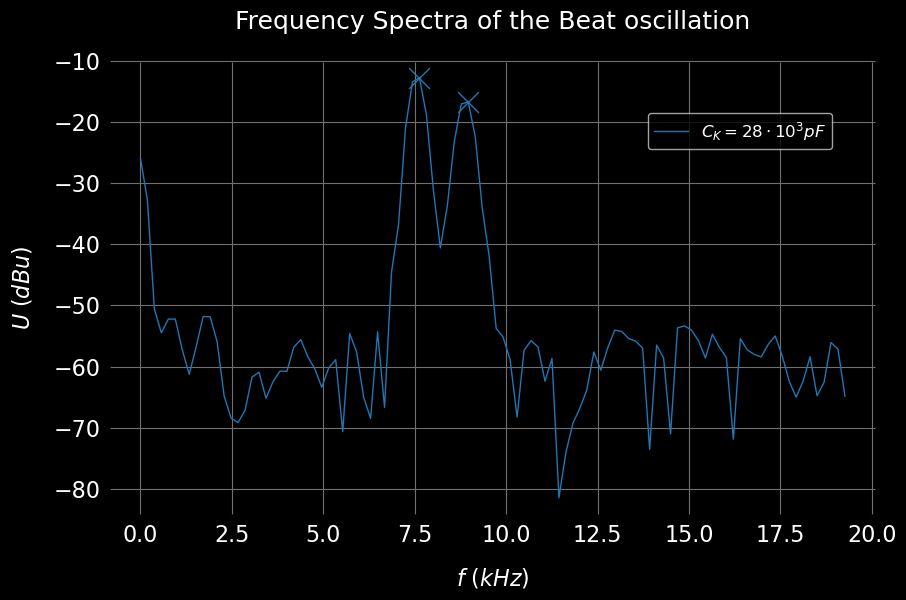

<IPython.core.display.Latex object>

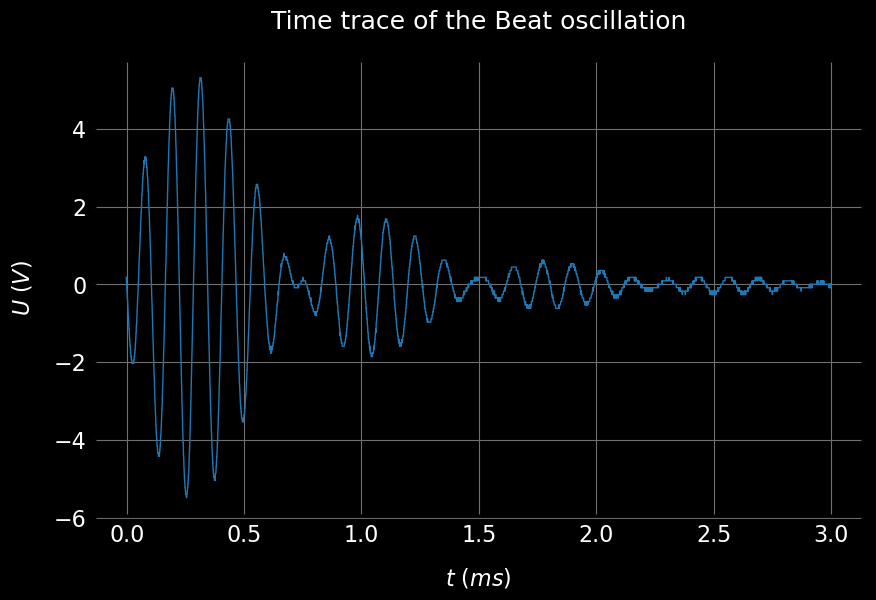

<IPython.core.display.Latex object>

In [14]:
plt.title(r'Frequency Spectra of the Beat oscillation')
plt.xlabel(r'$f$ ($kHz$)')
plt.ylabel(r'$U$ ($dBu$)')
plt.plot(x_f, y_f, label=r'$C_K = 28 \cdot 10^3 pF$')
plt.scatter(x_f[peaks],y_f[peaks], marker='x')
plt.legend(loc=(0.7,0.8))
plt.grid(True)
plt.show()
dy(Lx(r'$Figure\, 3.1$: Frequency spectra plot of the high-point circuit.'))

plt.title(r'Time trace of the Beat oscillation')
plt.xlabel(r'$t$ ($ms$)')
plt.ylabel(r'$U$ ($V$)')
#plt.legend(loc=(0.7,0.1))
plt.plot(x_t, y_t, label=r'$C_K = 28 \cdot 10^3 pF$')
plt.grid(True)
plt.show()
dy(Lx(r'$Figure\, 3.2$: Time trace plot of the high-point circuit.'))

***Analysis***

In [15]:
k = (w_out**2 - w_in**2) / (w_out**2 + w_in**2)
dy(Lx(r'Angular frequency of out-of-phase mode is $w_2 = %.2f ~rad\cdot ms^-$' % (w_out*1e-3)))
dy(Lx(r'Angular frequency of in-phase mode is $w_1 = %.2f ~rad\cdot ms^-$' % (w_in*1e-3)))
T_S = 2*np.pi/(w_out - w_in) # s
T = 2*np.pi/w_out # s
dy(Lx(r'The beat period: $$T_S = \frac{2\pi}{\omega_2 -\omega_1} = %.2f ms$$' % (T_S*1e3)))
dy(Lx(r'Whereas, the oscillation period: $$T = \frac{2\pi}{\omega_2} = %.2f ms$$' % (T*1e3)))
dy(Lx(r'Hence, in a beat there are $\frac{T_S}{T} \approx %d$ oscillations.' % (T_S//T)))
dy(Lx(r'The coupling factor: $$k_{C,H} = \frac{\omega_2^2 -\omega_1^2}{\omega_2^2 + \omega_1^2} = %.4f $$' % k))
C = C_k * (1/k - 1)
dy(Lx(r'The capacitance: $$C = C_k \left(\frac{1}{k_{C,H}} - 1\right) = %.2f ~\mu F$$' % (C*1e-6)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

It is observed, that the obtained result for the capacitance value is in agreement with the fitted result obtained in Task1 and Task2.

## Task 4

***Task Definition*** 

Measure the coupling factor $k_L$ for two inductively coupled resonant circuits as a function of the distance $d$ between the inductance coils. 
Plot the frequency spectra in one graph. 
Plot the coupling factor as a function of distance and analyze the distance dependence.

***Theoretical Basis***

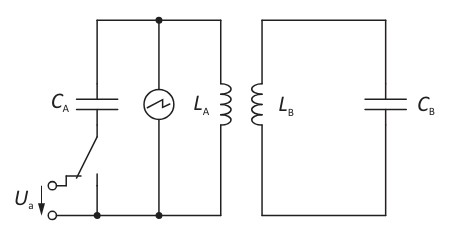

<IPython.core.display.Latex object>

In [16]:
dy(Im("./img/Reso.jpg", height=100, width=400))
dy(Lx(r'$Figure\, 4.1$: Coupled Resonant Circuit [1]'))

In Task4, a coupled resonant circuit is set up which produces beats similar to those in previous tasks. **Fig 4.1**.

The following conditions were imposed during the experiment: 

- $C_A = C_B = C$ 

- $L_A = L_B$

Under such conditions, the coupling factor $k_L$ and mutual inductance $M$ are given by:

$$\omega_1 = \frac{\omega_0}{\sqrt{1+k_L}}$$

$$k_L = \frac{\omega_0^2}{\omega_1^2} -1 \tag{4.1}$$

$$M = k_L \cdot L \tag{4.2}$$

- $\omega_0 = 1/\sqrt{LC}$ : Uncoupled angular frequncy measured during experiment

- $\omega_1$ : In-phase angular frequency

- $k_L$ : Coupling factor of Resonant Circuit 

- $M$ : Mutual Inductance


***Procedure***

1. The circuit was set up following the circuit diagram  **Fig 4.1**, and the distance $d$ between inductance coils $L_1$ and $L_2$ was recorded.
<br>

2. The corresponding frequency spectrum was recorded using [PicoScope 7 software](https://www.picotech.com/products/picoscope-7-software) installed on a host connected to the PicoScope 2000.
<br>

3. Subsequently, the frequency $f_1$ is determined by analyzing the peaks in the frequency spectra **Fig 1.2**. 
</br> 

4. The values of $k_{L}$ and $M$ are calculated using Eq [4.1](#mjx-eqn-eq1.1) and Eq [4.2](#mjx-eqn-eq1.1) respectively.
<br>

5. The process was repeated for 8 values of $d$, and a graph of $M(d)$ is plotted.
<br>

6. This graph is fitted to a power law.
<br>

In [17]:
# Data Preprocessing
task_dir = data_dir + 'Task4/csv/'
d_l = [] # Capacitance in pF
df_l = []

for path in os.listdir(task_dir):
    r = float(path[:-4]) #Slice last 4 elements and convert to float
    d_l.append(r) # cm floats
    df = pd.read_csv(task_dir + path, delimiter=',', skiprows=1, dtype=np.float64, decimal='.')
    df.columns = ['Frequency', 'Voltage'] 
    df_l.append(df)

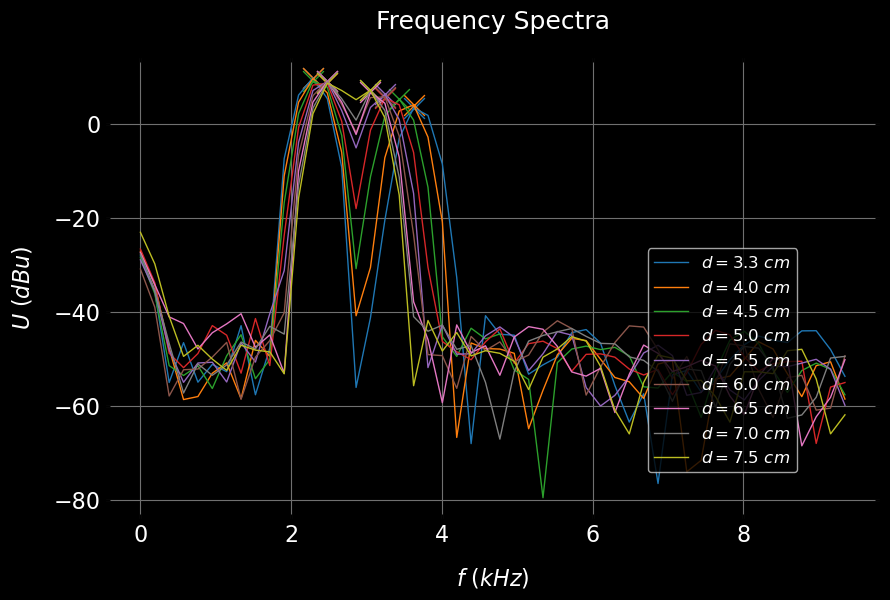

<IPython.core.display.Latex object>

In [18]:
f_in_l = [] # in kHz
f_out_l = [] # in kHz
w_in_l = [] # in rad * Hz
w_out_l = [] # in rad * Hz
for i in range(len(d_l)):
    
    label_s = r'$d = %.1f ~cm$' % (d_l[i])
    
    x = np.array(df_l[i]['Frequency'])
    y = np.array(df_l[i]['Voltage'])
    
    peaks, _ = find_peaks(y[:80], height=-40)
    w_in_l.append(x[peaks][0]*1e3*2*np.pi)
    w_out_l.append(x[peaks][1]*1e3*2*np.pi)
    
 
    plt.scatter(x[peaks], y[peaks], marker='x')
    plt.plot(x[:50], y[:50], label=label_s)
    
plt.title(r'Frequency Spectra')
plt.xlabel(r'$f$ ($kHz$)')
plt.ylabel(r'$U$ ($dBu$)')
plt.legend(loc=(0.7,0.1))
plt.grid(True)
plt.show()
dy(Lx(r'$Figure\, 4.1$: Frequency spectra plot of two inductively coupled resonant circuits.'))

In [19]:
L = 17.2e-3 #H
w_0 = 1/np.sqrt(L*C*1e-12) #rad Hz
w_in_arr = np.array(w_in_l)
w_out_arr = np.array(w_out_l)
f_0 = w_0/2/np.pi

In [20]:
def power_fit(d_arg,A1,A2):
    return A1+A2/np.sqrt((A2+d_arg**2)**3)

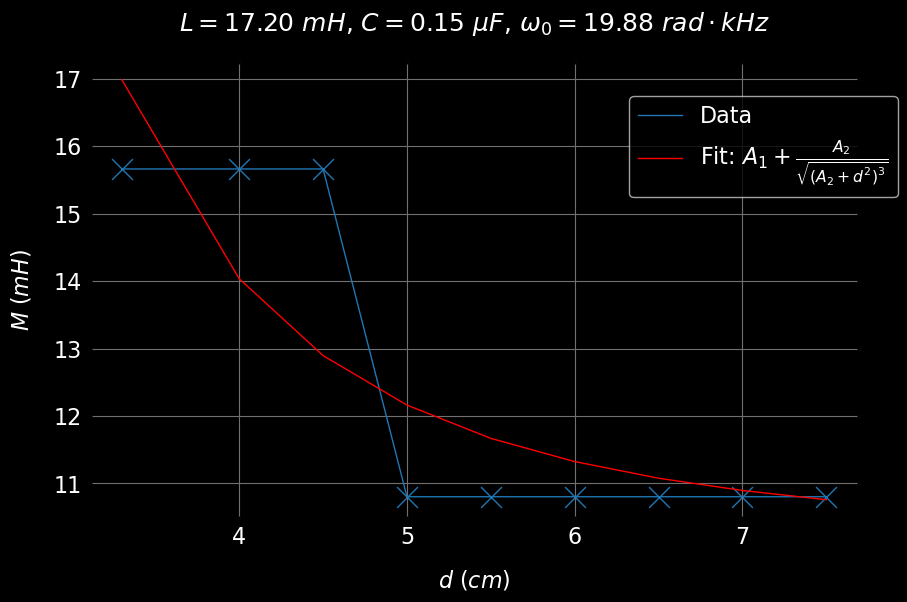

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [21]:
M = L*(w_0**2/w_in_arr**2-1)

#Fitting
fit = curve_fit(power_fit,np.array(d_l),M)
A1 = fit[0][0] 
A2 = fit[0][1]
u_A1 = np.sqrt(fit[1][0][0])
u_A2 = np.sqrt(fit[1][1][1])

#Plotting
plt.scatter(d_l, M*1e3, marker='x')
plt.plot(d_l, M*1e3, label='Data')
plt.plot(d_l, power_fit(np.array(d_l),A1,A2)*1e3, label= r'Fit: $A_1+\frac{A_2}{\sqrt{(A_2+d^2)^3}}$',color='r')

plt.title(r'$L = %.2f ~mH$, $C = %.2f ~\mu F$, $\omega_0 = %.2f ~rad \cdot kHz $' % (L*1e3, C*1e-6, w_0*1e-3))
plt.xlabel(r'$d$ ($cm$)')
plt.ylabel(r'$M$ ($mH$)')
plt.legend(loc=(0.7,0.7), fontsize= 16)
plt.grid(True)
plt.show()

dy(Lx(r'$Figure\, 4.2$: Mutual inductance as a function of distance between inductance coils.'))
dy(Lx(r'$$A_1 = %.2f \pm %.3f $$' % (A1*1e3, u_A1*1e3)))
dy(Lx(r'$$A_2 = %.2f \pm %.3f $$' % (A2*1e3, u_A2*1e3)))


## References

1) [E17e Lab instruction](https://moodle2.uni-leipzig.de/pluginfile.php/3621566/mod_resource/content/1/E17e_2024.pdf)